# **EDA**

## Objectives
* Explore the data to address the hypothesis: all attributes could impact charges to some extent, but which factors matter most?
* Find trends and correlations with **Charges**
* Use visuals to show these trends in an intuitive way
* Explain how these impact **Charges**

## Inputs
* Dataset: df_transformed.csv

## Outputs
* Addition of new "BMI_Cat" column
* New DataFrame, df_transformed_1.csv, saved to Dataset/Transformed

## Comments
* Explored distribution of each feature
* Analysed relationships between the charges and other factors
* Checked for numerical correlations 
* Summarised findings

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\Hackathon2_project_team3\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\Hackathon2_project_team3'

# Basic EDA

Import the necessary libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned dataset from the ETL notebook:

In [8]:
df = pd.read_csv("Dataset/Cleaned/df_transformed.csv")

Exploring the dataset:

In [6]:
df

,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_enc,Smoker_enc,Region_enc
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0
1,18,male,33.770,1,no,southeast,1725.55,1,1,1
2,28,male,33.000,3,no,southeast,4449.46,1,1,1
3,33,male,22.705,0,no,northwest,21984.47,1,1,2
4,32,male,28.880,0,no,northwest,3866.86,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.55,1,1,2
1333,18,female,31.920,0,no,northeast,2205.98,0,1,3
1334,18,female,36.850,0,no,southeast,1629.83,0,1,1
1335,21,female,25.800,0,no,southwest,2007.94,0,1,0


We will check how individual variables are distributed by plotting the distributions of: **Charges, Age, BMI, Children**.
This will ensure we are aware of any irregularities within the data before moving into hypothesis testing:

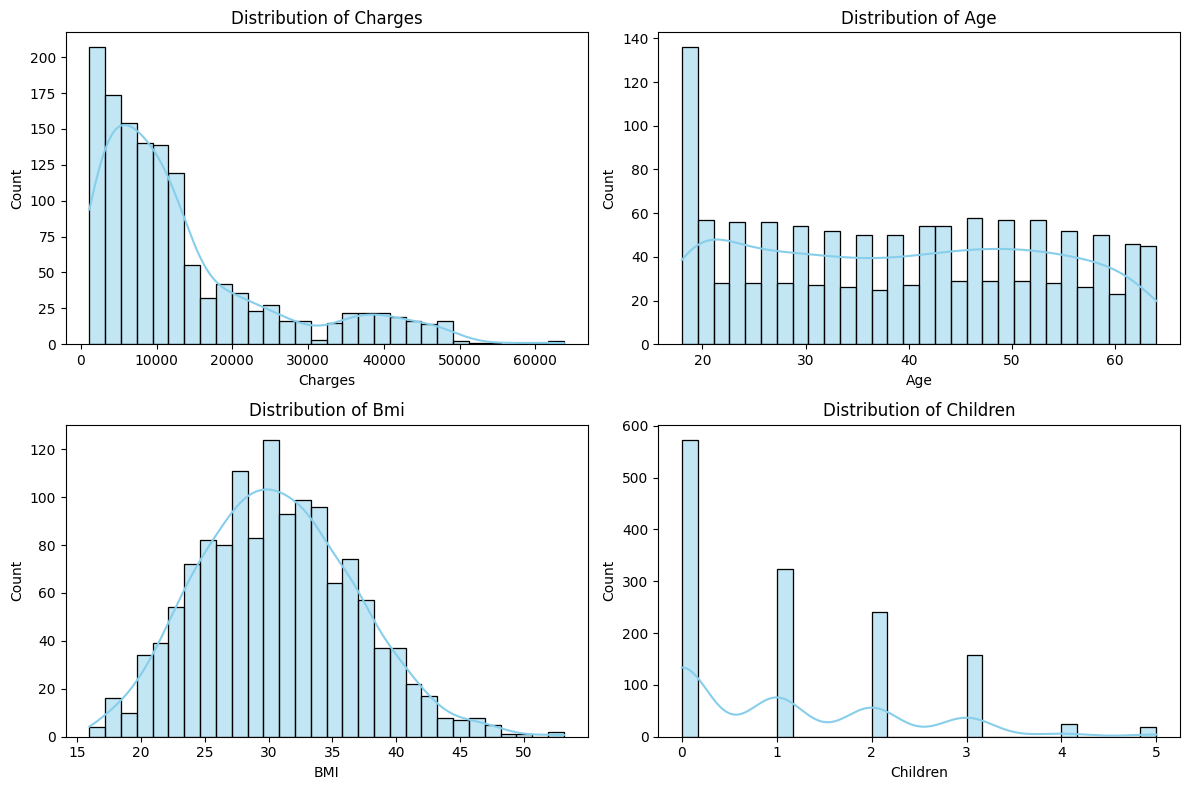

In [7]:
# Numeric columns to explore
cols = ['Charges', 'Age', 'BMI', 'Children']

# Create histograms
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)  
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}')

plt.tight_layout()
plt.show()

Summary:
* The dataset has right-skewness in charges and children
* There are outliers in charges (>40,000) however the "outliers" are being kept due to a chance of them being genuinely high medical costs and may be due to another factor
* The population is mostly young to middle-aged adults, overweight by BMI, and largely childless.
* Overall data is ready for further analysis 

As all the data is ready, we will now compare charges with certain other factors using some basic visualisations. We believe smoking will have a big impact so we are comparing it first by looking at median **Charges** by **Smoker**. 

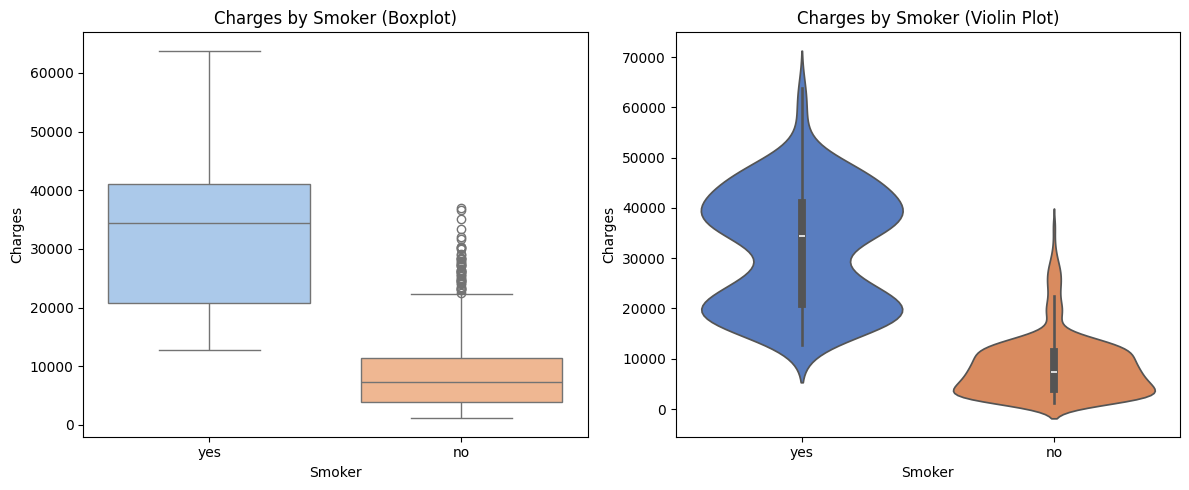

In [8]:
plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Smoker', y='Charges', data=df, palette='pastel', hue='Smoker', legend=False)
plt.title('Charges by Smoker (Boxplot)')
plt.ylabel('Charges')
plt.xlabel('Smoker')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Smoker', y='Charges', data=df, palette='muted', hue='Smoker', legend=False)
plt.title('Charges by Smoker (Violin Plot)')
plt.ylabel('Charges')
plt.xlabel('Smoker')

plt.tight_layout()
plt.show()


As expected, the people who smoke have a much higher median and wider range of charges than non-smokers. This could be one of the highest impacts on charges but we will test other factors.

Of interest, the violin plot suggests that smokers are dividing into 2 subpopulations. We will explore this further also.

The next one is **BMI vs. Charges:**

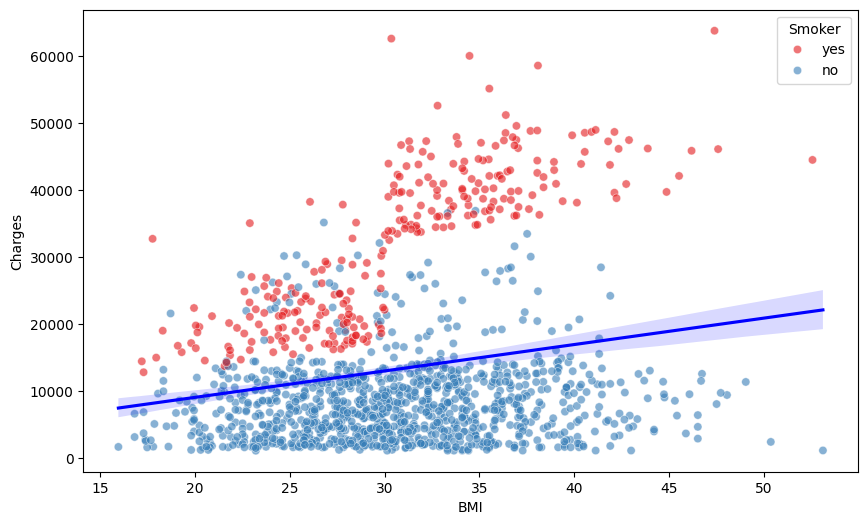

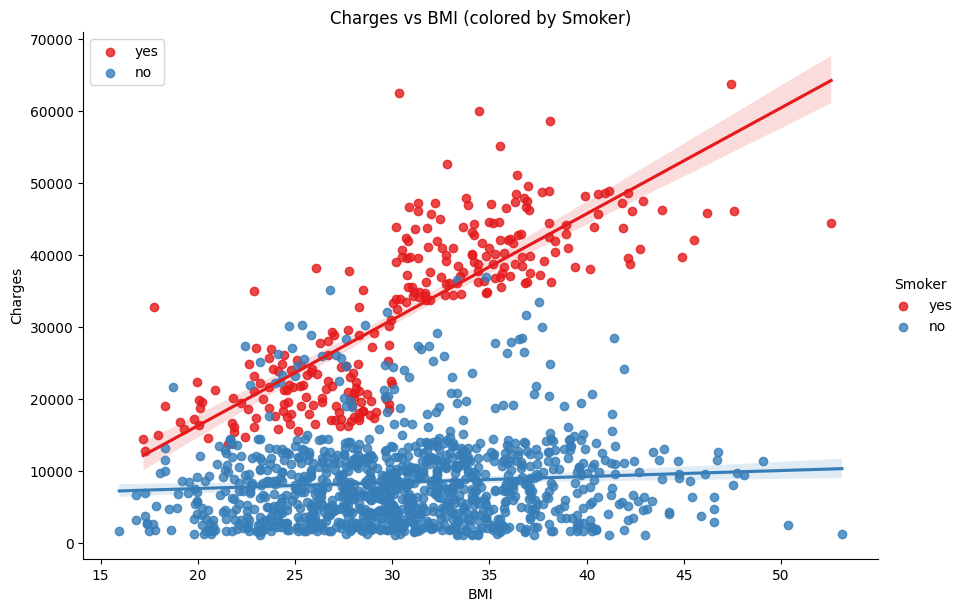

In [9]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line 
sns.scatterplot(x='BMI', y='Charges', hue='Smoker', data=df, palette='Set1', alpha=0.6)

# Regression line for all data
sns.regplot(x='BMI', y='Charges', data=df, scatter=False, color='blue', line_kws={'label':'Regression line'})

# Regression Line for smokers
sns.lmplot(x='BMI', y='Charges', hue='Smoker', data=df, height=6, aspect=1.5, palette='Set1')

plt.title('Charges vs BMI (colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


From these plots, we can see that smokers and non-smokers tend to form 2 distinct groups, those with **BMI** < 30 and those with **BMI** >= 30. While **Charges** increase with **BMI** for smokers, the same trend is not present for non-smokers. We do note that a population of non-smokers with higher charges overlap to some extent with smokers with lower BMIs.

Overall, this shows that **BMI** only has an impact on **Charges** for smokers. 

The next one is **Age vs. Charges:**

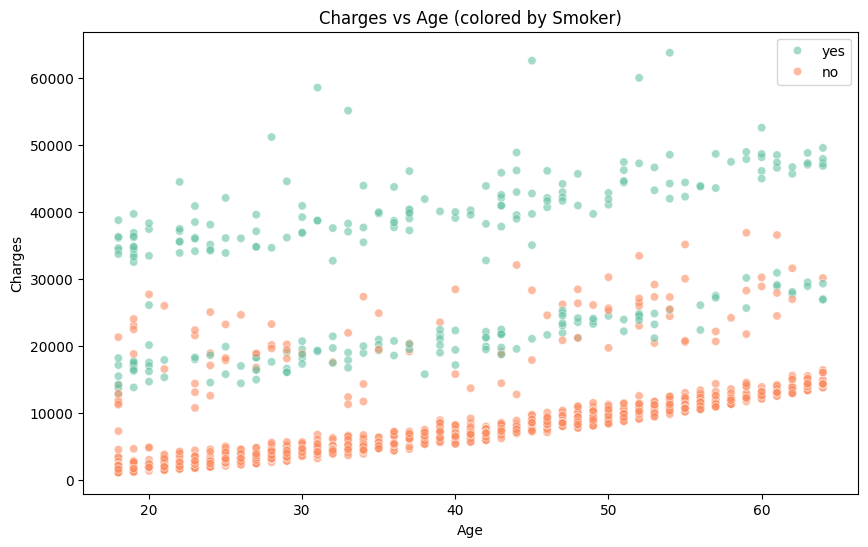

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.scatterplot(x='Age', y='Charges', hue='Smoker', data=df, palette='Set2', alpha=0.6)

plt.title('Charges vs Age (colored by Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


From this we can see that **Charges** increases linearly with **Age**, but we have 3 different subpopulations: the first with the lowest charges which are uniquely non-smokers; the second with moderate charges which are mixed with smokers and non-smokers; and lastly, the higher charges which are uniquely smokers.  

From our previous scatter plot of **BMI** vs. **Charges** we can predict that the moderate charges group contain smokers with BMI < 30 and our higher charges non-smokers, with no correlation with BMI.  

Now lets visualise all 3 factors at once to confirm: **Age vs. Charges by Smoker and BMI**

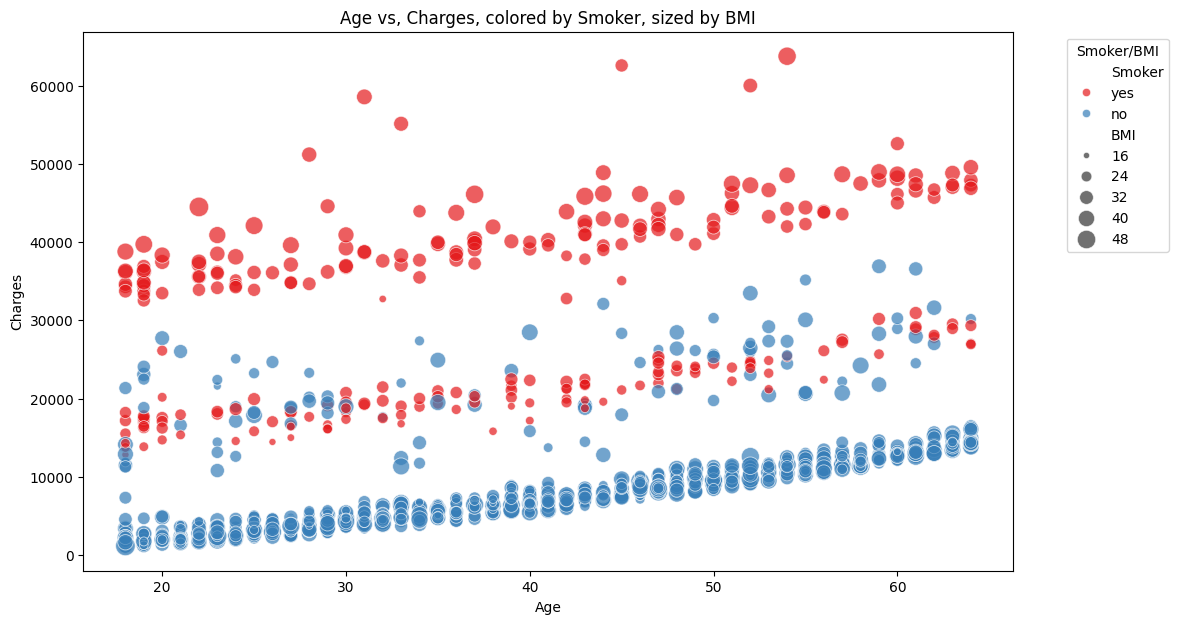

In [12]:
plt.figure(figsize=(12, 7))

# Scatter plot: age vs charges, color=smoker, size=BMI
sns.scatterplot(
    x='Age', 
    y='Charges', 
    hue='Smoker', 
    size='BMI', 
    sizes=(20, 200),  # scale point sizes
    data=df, 
    palette='Set1', 
    alpha=0.7
)

plt.title('Age vs, Charges, colored by Smoker, sized by BMI')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker/BMI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


From this plot we can see same trend of 3 distinct populations made from 2 distinct subpopultions for both smokers and non-smokers. While BMI separates the 2 smoker populations, it does not separate the 2 non-smoker populations.  

Next, we will continue to look at the other features, **Region by Charges:**

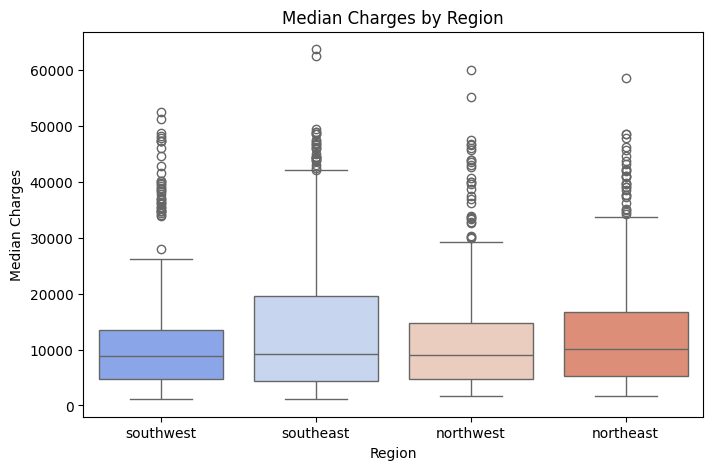

In [11]:
plt.figure(figsize=(8, 5))

# Bar plot of average charges per region
sns.boxplot(x='Region', y='Charges', data=df, palette='coolwarm', hue='Region', legend=False)
plt.title('Median Charges by Region')
plt.xlabel('Region')
plt.ylabel('Median Charges')
plt.show()


From the box plot we can see that Region doesn't have a significant impact on median chagres, but we note that the region "southeast" seems to have a higher range in the direction of higher charges. We conclude that **Region** doesn't impact **Charges**. 

The next one is **Charges by Children:**

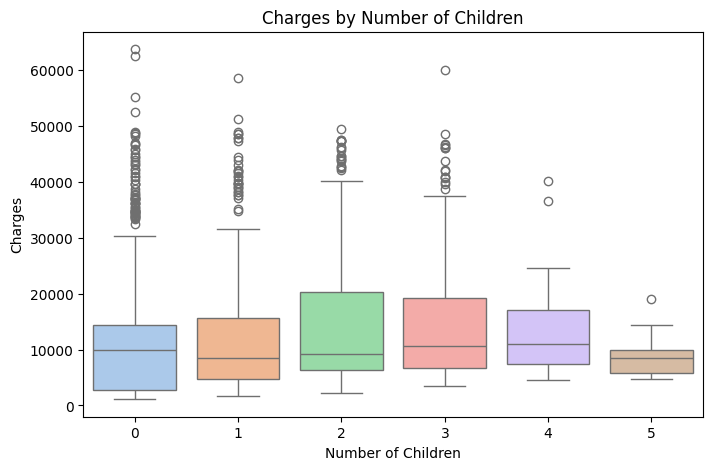

In [12]:
plt.figure(figsize=(8, 5))

# Boxplot of charges grouped by number of children
sns.boxplot(x='Children', y='Charges', data=df, palette='pastel', hue='Children', legend=False)
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


From this plot we can see that there doesn't seem to be a correlation between the charges and number of children. We conclude that the number of children doesnt have an impact on the charges.

Now that we have seen how the individual factors impact charges, we will create a heatmap to show which factors (numerical) create the biggest impact:

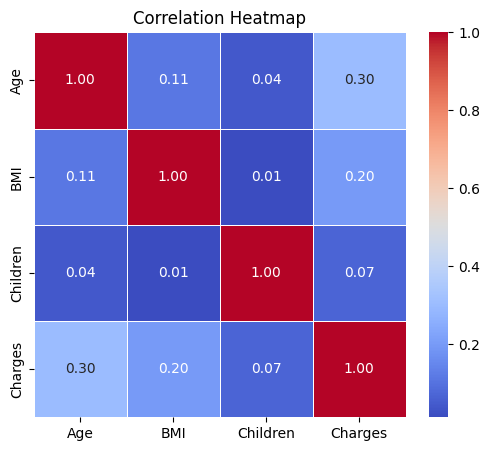

In [13]:
# Select numeric columns
num_cols = ['Age', 'BMI', 'Children', 'Charges']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


From this heatmap we can see that age has the most impact out of the numerical factors. The reason why BMI is not higher despite showing a great impact in the graph above is due to the **Charges** not being impacted by **BMI** for non-smokers.  

Here is the same heatmap but only including smokers:

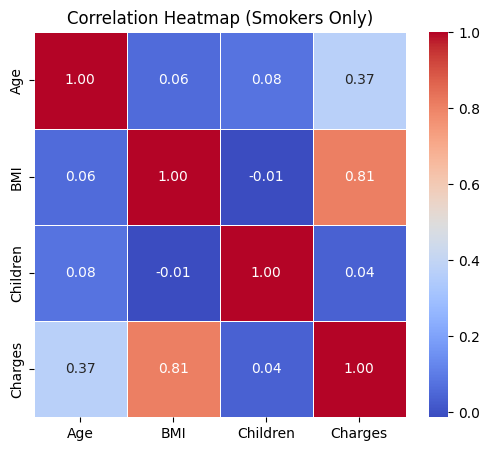

In [14]:
smokers_df = df[df['Smoker'] == 'yes']

num_cols = ['Age', 'BMI', 'Children', 'Charges']

corr_matrix_smokers = smokers_df[num_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix_smokers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Smokers Only)')
plt.show()


As we can see, the score for **BMI** has increased a lot, showing that for smokers, BMI is a significant factor.

---

## Create BMI_vs_Age column and detect outliers

We create a new column `BMI_vs_Age` to explore the relationship between BMI and Age. We then visualize its distribution and identify outliers using the IQR method.

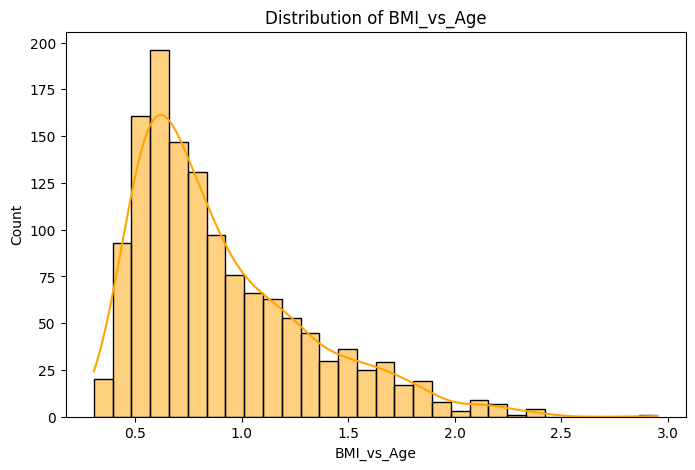

Number of outliers in BMI_vs_Age: 32


,Age,BMI,BMI_vs_Age
46,18,38.665,2.148056
50,18,35.625,1.979167
161,18,36.850,2.047222
181,18,38.280,2.126667
194,18,34.430,1.912778
263,19,36.955,1.945000
354,18,38.280,2.126667
391,19,37.430,1.970000
399,18,38.170,2.120556
442,18,43.010,2.389444


In [16]:
# Create BMI_vs_Age column
if 'BMI_vs_Age' not in df.columns:
    df['BMI_vs_Age'] = df['BMI'] / df['Age']

# Visualize distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI_vs_Age'], bins=30, kde=True, color='orange')
plt.title('Distribution of BMI_vs_Age')
plt.xlabel('BMI_vs_Age')
plt.show()

# Detect outliers using IQR
Q1 = df['BMI_vs_Age'].quantile(0.25)
Q3 = df['BMI_vs_Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BMI_vs_Age'] < lower_bound) | (df['BMI_vs_Age'] > upper_bound)]
print(f"Number of outliers in BMI_vs_Age: {outliers.shape[0]}")
display(outliers[['Age', 'BMI', 'BMI_vs_Age']])

### Interpretation of BMI_vs_Age Outliers

The outliers detected in the `BMI_vs_Age` column represent individuals whose BMI is unusually high or low relative to their age. These cases may indicate:
- Data entry errors or anomalies
- Individuals with extreme health conditions
- Young individuals with very high BMI, or older individuals with very low BMI

It is important to review these outliers further to determine if they should be excluded from analysis or if they provide meaningful insights into the population's health risks.

### BMI Categories Analysis

To better understand the impact of BMI on insurance charges, we categorize BMI into four groups: Underweight, Normal, Overweight, and Obese. This allows us to compare charges across different BMI categories and identify trends or risk groups.

C:\Users\sonia\AppData\Local\Temp\ipykernel_53384\4051777367.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI_Cat', y='Charges', data=df, palette='Set2')


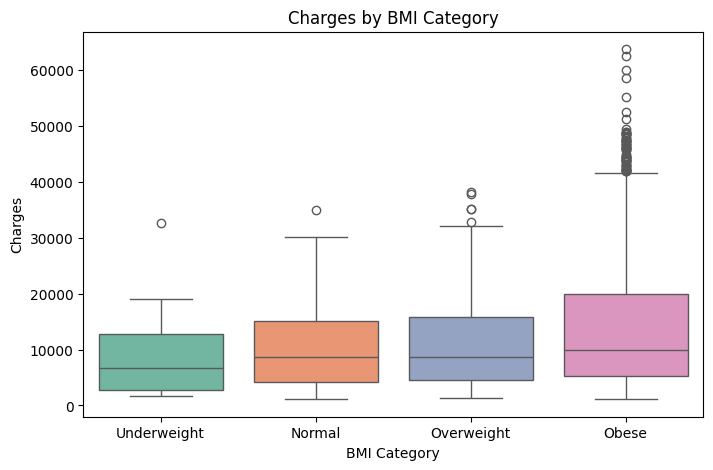

In [13]:
# Create BMI categories
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Cat'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

# Visualize charges by BMI category
plt.figure(figsize=(8, 5))
sns.boxplot(x='BMI_Cat', y='Charges', data=df, palette='Set2')
plt.title('Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.show()

We are going to summarise the impact of each feature: 

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Used co-pilot to assess feature importance via linear regression coefficients

# Features: numeric + encoded categorical
features = ['Age', 'BMI', 'Children', 'Sex_enc', 'Smoker_enc', 'Region_enc']
X = df[features]
y = df['Charges']

# Scale features so coefficients are comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Collect coefficients
coef = model.coef_

# Put into DataFrame
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef,
    'AbsImpact': np.abs(coef)
}).sort_values(by='AbsImpact', ascending=False)

# Normalize impact (0–1 scale)
importance['ImpactScore'] = importance['AbsImpact'] / importance['AbsImpact'].max()

print(importance)


      Feature  Coefficient    AbsImpact  ImpactScore
4  Smoker_enc -9614.722811  9614.722811     1.000000
0         Age  3610.896094  3610.896094     0.375559
1         BMI  2028.230791  2028.230791     0.210951
2    Children   576.977580   576.977580     0.060010
5  Region_enc   391.108027   391.108027     0.040678
3     Sex_enc   -64.697238    64.697238     0.006729


Here we can see the coefficient, the AbsImpact and the ImpactScore. 

* Coefficient: This tells you how much the charges change for a 1 unit increase within that feature. For example, when age increases by 1 you can expect the charges to increase by 3611. The reason why Smoker_enc has a negative is due to `0 = smoker` and `1 = non-smoker`
* AbsImpact: Absolute value of coefficient `|Coefficient|`
* ImpactScore: This is a normalised value between 0-1 that makes the effect of the coeffcients comparable despite them all not being one data type

C:\Users\hamas\AppData\Local\Temp\ipykernel_16712\581175184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


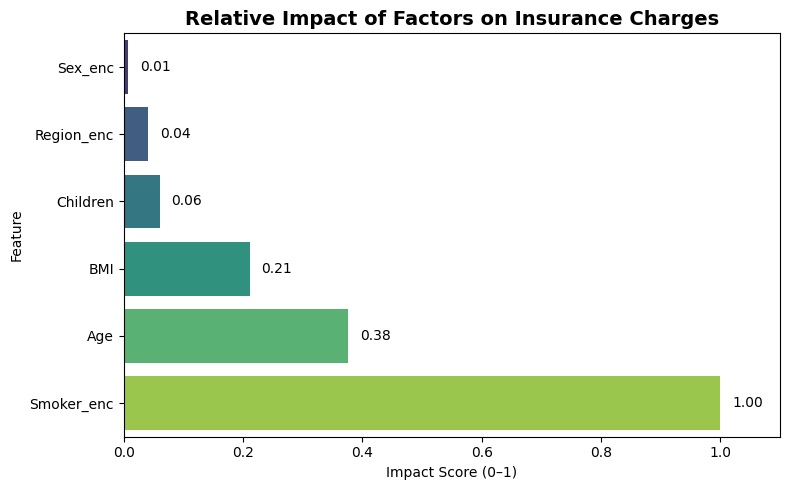

In [23]:
#Used co-pilot to visualize feature importance

# Sort by ImpactScore for cleaner visualization
importance_sorted = importance.sort_values(by='ImpactScore', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='ImpactScore', 
    y='Feature', 
    data=importance_sorted, 
    palette='viridis'
)

plt.title('Relative Impact of Factors on Insurance Charges', fontsize=14, weight='bold')
plt.xlabel('Impact Score (0–1)')
plt.ylabel('Feature')

# Annotate bars with exact values
for i, (score, feature) in enumerate(zip(importance_sorted['ImpactScore'], importance_sorted['Feature'])):
    plt.text(score + 0.02, i, f"{score:.2f}", va='center', fontsize=10)

plt.xlim(0, 1.1)  # make room for labels
plt.tight_layout()
plt.show()


As we added a new column **BMI_Cat**, we are going to save the transformed DataFrame.

In [15]:
df.to_csv("Dataset/Transformed/df_transformed_1.csv", index=False)

---

# Conclusions & Next Steps:

### Conclusions:
* The EDA revealed strong relationships between charges and the factors smoking status, BMI, and age.
* Smokers with BMI > 30 i.e. classified as Obese, incur significantly higher charges
* Age is positively correlated with charges for smoker and non-smokers
* Region and number of children have no impact on charges
* Outliers in charges and BMI vs Age were identified and reviewed for further analysis

### Next Steps:
- Use insights from EDA to guide focused data visualizations.
- Create clear and informative plots to communicate key findings.
- Highlight relationships and trends identified in EDA using advanced visual techniques.
- Prepare visualizations for presentation and reporting.
- Create a model to predict charges for potential customers using: **Age**, **Smoker** and **BMI**.
- Ensure all visualizations are interpretable and support the project's objectives.